In [2]:
import os
import json
import csv

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [25]:
from sklearn.model_selection import train_test_split

In [4]:
source_file_path = '/home/user3/Documents/by_stats.csv'

In [7]:
def try_to_int(value, err_value=None):
    try:
        return int(value)
    except:
        return err_value


def try_to_float(value, err_value=None):
    try:
        return float(value)
    except:
        return err_value

In [11]:
# fid	id	@id	building	building:levels	layer	path	area	perimeter

raw_dataset = []
with open(source_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        item = [row['layer'],
                row['building'],
                try_to_int(row['building:levels']),
                try_to_float(row['area']),
                try_to_float(row['perimeter'])]
        raw_dataset.append(item)

print(len(raw_dataset), 'items.')

386193 items.


In [12]:
# Check cities
set([i[0] for i in raw_dataset])

{'baranovichi baranovichi',
 'bobruisk bobruisk',
 'brest brest',
 'homel homel',
 'hrodna hrodna',
 'minsk minsk',
 'mogilev mogilev',
 'molodechno molodechno',
 'orsha orsha',
 'vitebsk vitebsk'}

In [23]:
# Check building types counts with levels
_total = 0
_counts = {}
for layer, building, levels, area, perimeter in raw_dataset:
    if levels is not None:
        _total += 1
        if building not in _counts:
            _counts[building] = 0
        _counts[building] += 1

print('Total', _total, '\n')
most_common = sorted([(k, v) for k, v in _counts.items()], key=lambda x: -x[1])
_ = [print(k, v) for k, v in most_common if v > 500]

Total 129784 

yes 75567
house 19367
apartments 14550
residential 5698
detached 2556
service 2226
garages 1676
industrial 1323
retail 1227
kindergarten 775
public 583
dormitory 533
commercial 509


In [37]:
# Check building types counts without levels
_total = 0
_counts = {}
for layer, building, levels, area, perimeter in raw_dataset:
    if levels is None:
        _total += 1
        if building not in _counts:
            _counts[building] = 0
        _counts[building] += 1

print('Total', _total, '\n')

most_common = sorted([(k, v) for k, v in _counts.items()], key=lambda x: -x[1])
_ = [print(k, v) for k, v in most_common if v > 500]
print('\nTotal after threshold', sum([v for k, v in most_common if v > 500 and k != 'yes']))

Total 256409 

yes 183542
house 42138
residential 7379
garages 5124
detached 5031
industrial 3260
apartments 2181
construction 1489
service 1362
roof 833
garage 620

Total after threshold 69417


In [47]:
# Check building types counts without levels
_total = 0
_counts = {}
for layer, building, levels, area, perimeter in raw_dataset:
    if levels is not None:
        _total += 1
        if levels not in _counts:
            _counts[levels] = 0
        _counts[levels] += 1

print('Total', _total, '\n')

most_common = sorted([(k, v) for k, v in _counts.items()], key=lambda x: -x[1])
_ = [print(k, v) for k, v in most_common if v > 100]
print('\nTotal after threshold', sum([v for k, v in most_common if v > 100]))

Total 129784 

1 101005
2 8369
5 5998
9 5190
3 2800
4 1954
10 1641
12 668
7 343
6 343
19 254
16 225
8 206
14 164

Total after threshold 129160


In [46]:
builing_keys_index = {'null': 0,
                      'house': 1,
                      'residential': 2,
                      'garages': 3,
                      'detached': 4,
                      'industrial': 5,
                      'apartments': 6,
                      'construction': 7,
                      'garage': 8
                     }
 

In [64]:
# Make vectored dataset for futher proecessing
vectored_dataset = []
for layer, building, levels, area, perimeter in raw_dataset:
    if levels is not None:
        building_key = 0
        if building in builing_keys_index:
            building_key = builing_keys_index[building]
        vectored_dataset.append((area, perimeter, levels))

In [65]:
X, y = train_test_split(np.array(vectored_dataset))

In [80]:
from sklearn.tree import export_graphviz
import pydot

In [83]:
tX, ty = X[:,:-2], X[:,-1]

from sklearn.ensemble import RandomForestClassifier
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(tX, ty)# Extract the small tree
tree_small = rf_small.estimators_[5]# Save the tree as a png image

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

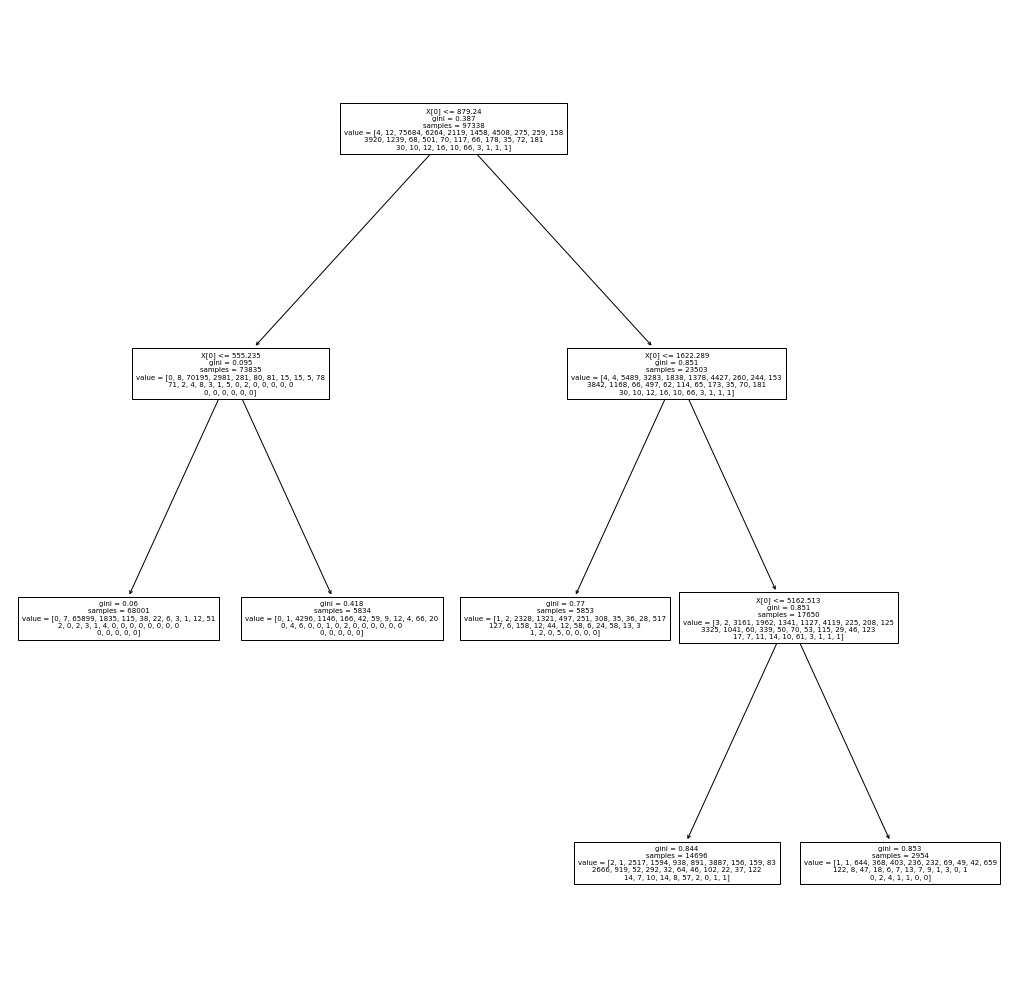

In [72]:
plt.figure(figsize=(18,18))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=7)
plt.show()